raw data
         Date       AAPL       AMZN      GOOGL        META        MSFT
0  2020-01-02  72.400513  94.900497  67.920807  208.324799  152.505707
1  2020-01-03  71.696640  93.748497  67.565491  207.222488  150.606766
2  2020-01-06  72.267944  95.143997  69.366386  211.125214  150.996017
3  2020-01-07  71.928032  95.343002  69.232399  211.582031  149.619278
4  2020-01-08  73.085121  94.598503  69.725174  213.727051  152.002502
checking null
date     0
AAPL     0
AMZN     0
GOOGL    0
META     0
MSFT     0
dtype: int64
Done, file is saved at: ../data/processed\big_tech_stock_clean.csv
        date  AAPL_price  AMZN_price  GOOGL_price  META_price  MSFT_price  \
0 2020-01-01   75.188594   94.211880    71.269485  215.140506  155.714039   
1 2020-02-01   75.172667  103.308763    72.594185  206.065826  169.879113   
2 2020-03-01   63.413293   93.615522    58.812788  164.597966  145.242898   
3 2020-04-01   65.815559  111.435262    61.044338  175.775494  160.938259   
4 2020-05-01   75.05

C:\Users\Thien An Nguyen\AppData\Local\Temp\ipykernel_21120\1835691810.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stock = df_stock.fillna(method='ffill')


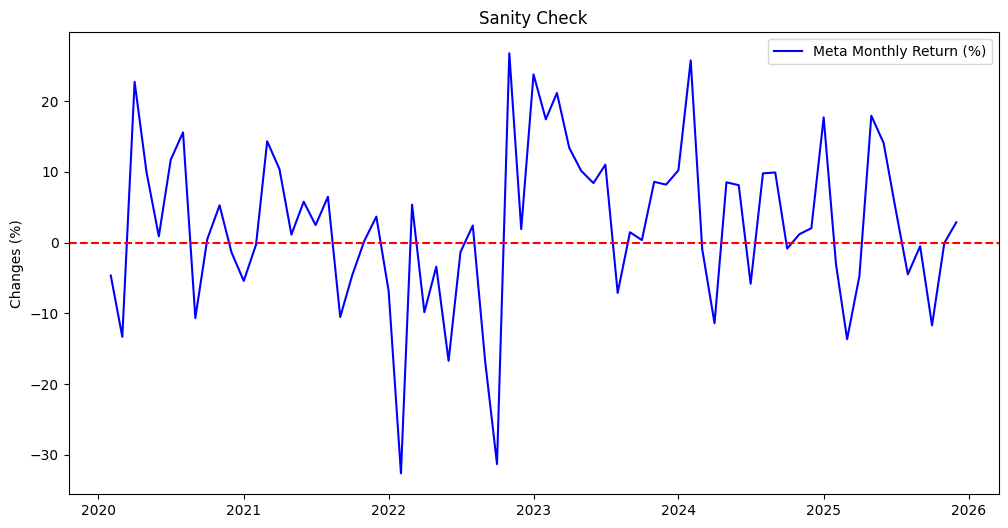

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Loading raw data
input_path = '../data/raw/big_tech_stock_prices.csv'
df_stock = pd.read_csv(input_path)

print("raw data")
print(df_stock.head())

#cleaning
df_stock.rename(columns={'Date': 'date'}, inplace=True)

df_stock['date'] = pd.to_datetime(df_stock['date'])

print("checking null")
print(df_stock.isnull().sum())
#if null, forward fill
df_stock = df_stock.fillna(method='ffill')
#Change daily to monthly
#set date as idx to sample

df_stock.set_index('date', inplace=True)

df_monthly_price = df_stock.resample('MS').mean()

#change in price, comparing to last month. This is important
df_monthly_return = df_stock.resample('MS').last().pct_change() * 100

#renaming col
df_monthly_price.columns = [f"{col}_price" for col in df_monthly_price.columns]
df_monthly_return.columns = [f"{col}_return" for col in df_monthly_return.columns]

df_final = pd.concat([df_monthly_price, df_monthly_return], axis=1)
df_final = df_final.reset_index() 

# saving
output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'big_tech_stock_clean.csv')

df_final.to_csv(output_path, index=False)

print(f"Done, file is saved at: {output_path}")
print(df_final.head())

# Check by plting...
plt.figure(figsize=(12, 6))
plt.plot(df_final['date'], df_final['META_return'], label='Meta Monthly Return (%)', color='blue')
plt.axhline(0, color='red', linestyle='--') # Đường kẻ ngang số 0
plt.title('Sanity Check')
plt.ylabel('Changes (%)')
plt.legend()
plt.show()